<a href="https://colab.research.google.com/github/Pabloacostatec/iayaa-Equipo-25/blob/main/SVM_Equipo25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**

##**Curso: Inteligencia Artificial y Aprendizaje Automático**

###Tecnológico de Monterrey

###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 8**
###**Máquina de Vector Soporte - Support Vector Machine(SVM)**


**Nombres y matrículas de los integrantes del equipo:**

* Genaro Rodriguez Vazquez A01150931
* Juan Pablo Acosta López A01794035
* Maria Nelly Porras Alcantar A01793828
* Juan Carlos Torres Luna A01163204

En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns 

#For pipeline creation
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#For scoring RMSE, MAE y MAPE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import mean_absolute_percentage_error
from tabulate import tabulate

# models from sklearn to test
from sklearn.dummy import DummyClassifier

#Gridsearch and importance
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import power_transform
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import math as math


from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
from imblearn.metrics import geometric_mean_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.model_selection import learning_curve, validation_curve
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay   
from sklearn.metrics import roc_curve,plot_roc_curve, balanced_accuracy_score


scaler = StandardScaler()

#**Ejercicio-1.** 

Realiza una partición de los datos con 15% en el conjunto de prueba y el resto para entrenamiento y 
validación. Usa un random_state=0. 

In [ ]:
df = pd.read_csv('australian.dat', sep=" ", header=None)
df = df.rename(columns={0:"A1"})
df = df.rename(columns={1:"A2"})
df = df.rename(columns={2:"A3"})
df = df.rename(columns={3:"A4"})
df = df.rename(columns={4:"A5"})
df = df.rename(columns={5:"A6"})
df = df.rename(columns={6:"A7"})
df = df.rename(columns={7:"A8"})
df = df.rename(columns={8:"A9"})
df = df.rename(columns={9:"A10"})
df = df.rename(columns={10:"A11"})
df = df.rename(columns={11:"A12"})
df = df.rename(columns={12:"A13"})
df = df.rename(columns={13:"A14"})
df = df.rename(columns={14:"class"})


df .head(3) 

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0


In [ ]:
df['A4'] = df['A4'].map({2:2, 1:0, 3:0})
df['A5'] = df['A5'].map({1:1,2:0,3:3,4:4,5:0,6:6,7:7,8:8,9:9,10:0,11:11,12:0,13:13,14:14})
df['A6'] = df['A6'].map({1:1,2:0,3:0,4:4,5:5,7:0,8:8,9:0})

In [ ]:
y = df[['class']]
X = df.drop(columns='class')


Xtv, Xtest, ytv, ytest = train_test_split(X, y, test_size=.15, random_state=0)

print(Xtv.shape, ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtest.shape, ': dimensión de datos de entrada "X" para prueba')  

print(ytv.shape, ': dimensión de variable de salida  "Y" para  entrenamiento y validación')
print(ytest.shape, ': dimensión de variable de salida "Y" para prueba')


(586, 14) : dimensión de datos de entrada "X" para entrenamiento y validación
(104, 14) : dimensión de datos de entrada "X" para prueba
(586, 1) : dimensión de variable de salida  "Y" para  entrenamiento y validación
(104, 1) : dimensión de variable de salida "Y" para prueba


#**Ejercicio-2.**

Hacer una análisis de los datos y llevar a cabo las transformaciones que consideres adecuadas. 
Utiliza un Pipeline para evitar el filtrado de información. 


In [ ]:
"""
A1: 0,1 CATEGORICAL (formerly: a,b)
A2: continuous.
A3: continuous.
A4: 1,2,3 CATEGORICAL (formerly: p,g,gg)
A5: 1, 2,3,4,5, 6,7,8,9,10,11,12,13,14 CATEGORICAL (formerly: ff,d,i,k,j,aa,m,c,w, e, q, r,cc, x)
A6: 1, 2,3, 4,5,6,7,8,9 CATEGORICAL (formerly: ff,dd,j,bb,v,n,o,h,z)
A7: continuous.
A8: 1, 0 CATEGORICAL (formerly: t, f)
A9: 1, 0 CATEGORICAL (formerly: t, f)
A10: continuous.
A11: 1, 0 CATEGORICAL (formerly t, f)
A12: 1, 2, 3 CATEGORICAL (formerly: s, g, p)
A13: continuous.
A14: continuous.
A15: 1,2 class attribute (formerly: +,-)
"""

#Never put OUTPUT variable on the transformation pipeline where the INPUT transfromation happens, create a new one if needed
# Transformaciones a factores numéricos de entrada:
num_pipeline = Pipeline(steps = [('impMediana', SimpleImputer(strategy='median')),
                                 ('escalaNum', MinMaxScaler(feature_range=(1,2)))])   
num_pipeline_nombres = ['A2','A3','A7','A10','A13','A14']

# Transformaciones a factores categóricos de entrada:
catImp_pipeline = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent'))])  
catImp_pipeline_nombres = ['A1', 'A4', 'A5', 'A6', 'A8', 'A9', 'A11', 'A12']

catOHE_pipeline = Pipeline(steps = [('OneHotE', OneHotEncoder(drop='first'))])
catOHE_pipeline_nombres = [ 'A4','A5','A6','A12']


# Conjuntamos las transformaciones numéricas y categóricas que se estarán aplicando a los datos de entrada:
preprocessor = ColumnTransformer(transformers = [('numpipe', num_pipeline, num_pipeline_nombres),
                                                        ('catimp', catImp_pipeline, catImp_pipeline_nombres),
                                                        ('catohe', catOHE_pipeline, catOHE_pipeline_nombres)],
                                        remainder='passthrough')

#Call column transformer
#XtrainFit = preprocessor.fit(Xtv)
#XtrainvalTransf = pd.DataFrame(XtrainFit.transform(Xtv))

#New_Labels=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14']
#XtrainvalTransf.columns = New_Labels
#XtrainvalTransf

XtrainvalTransf = preprocessor.fit_transform(Xtv)

#optional
XtrainvalTransf_asDataFrame = pd.DataFrame(XtrainvalTransf)
#New_Labels=[<List all the new names>]
#XtrainvalTransf_asDataFrame.columns = New_Labels
XtrainvalTransf_asDataFrame



,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,1.537594,1.270893,1.266140,1.223881,1.0000,1.05000,1.0,2.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.093985,1.044643,1.004386,1.000000,1.0700,1.00004,1.0,0.0,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.207970,1.072857,1.070175,1.044776,1.1850,1.00560,1.0,0.0,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.147820,1.016429,1.092105,1.089552,1.1040,1.00347,1.0,0.0,9.0,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.211729,1.053571,1.070175,1.164179,1.2170,1.00035,1.0,2.0,9.0,4.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1.171729,1.107143,1.043860,1.014925,1.0000,1.00022,1.0,2.0,8.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
582,1.223008,1.126429,1.017544,1.000000,1.0855,1.00000,0.0,2.0,3.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
583,1.165414,1.019286,1.035088,1.000000,1.0600,1.00001,1.0,2.0,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
584,1.510075,1.010357,1.526316,1.298507,1.0000,1.15000,1.0,2.0,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#**Ejercicio-3.**

Utiliza la función Dummy para modelos de clasificación con la estrategia “stratified” con el conjunto 
que tienes de datos de entrenamiento y validación. Obtener los valores de partida (baseline) de las 
siguientes métricas: accuracy, f1-score, precision y recall.

¿Por qué consideras que es adecuado usar la estrategia “stratified” en este caso?

    La funcionalidad de stratified nos permite asegurarnos que las predicciones del modelo Dummy sean representadas
    
    equitativamente con las misma distribución que la distribución de los datos de entrenamiento, por lo tanto, esta metodología]
    
    es útil para asegurar representatividad a la clase minoritaria.

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(Xtv,ytv, train_size=.85, random_state=1)

#print(Xtv.shape     , ': dimensión de datos de entrada "X" para entrenamiento y validación')
print(Xtrain.shape , ': dimensión de datos de entrada "X" para entrenamiento ')
print(Xval.shape   , ': dimensión de datos de entrada "X" para validación')


#print(ytv.shape, ': dimensión de datos de salida "y" para entrenamiento y validación')
print(ytrain.shape, ': dimensión de datos de salida "y" para entrenamiento ')
print(yval.shape, ': dimensión de datos de salida "y" para validación')

#Xtrain

(498, 14) : dimensión de datos de entrada "X" para entrenamiento 
(88, 14) : dimensión de datos de entrada "X" para validación
(498, 1) : dimensión de datos de salida "y" para entrenamiento 
(88, 1) : dimensión de datos de salida "y" para validación


In [ ]:

dummy_regr = DummyClassifier(strategy="stratified")


dummy_regr.fit(Xtrain, ytrain)

#For Training dataset scoring
yhat = pd.DataFrame(dummy_regr.predict(Xtrain))

#For validation dataset scoring
ypred = pd.DataFrame(dummy_regr.predict(Xval))

print("Resultados Dummy Classifier - Entrenamiento")

train_acc = accuracy_score(ytrain,yhat)           
print("acc_train: ",train_acc)

train_f1score = f1_score(ytrain,yhat, average='macro')           
print("F1 score_train: ",train_f1score)

train_prec = precision_score(ytrain,yhat, average='macro')           
print("Precision_train: ",train_prec)

train_recall = recall_score(ytrain,yhat, average='macro')           
print("Recall_train: ",train_recall)

print("\n")

print("Resultados Dummy Classifier - Validacion")

val_acc = accuracy_score(yval,ypred)           
print("acc_val: ",val_acc)

val_f1score = f1_score(yval,ypred, average='macro')           
print("F1 score_val: ",val_f1score)

val_prec = precision_score(yval,ypred, average='macro')           
print("Precision_val: ",val_prec)

val_recall = recall_score(yval,ypred, average='macro')           
print("Recall_val: ",val_recall)


Resultados Dummy Classifier - Entrenamiento
acc_train:  0.5080321285140562
F1 score_train:  0.5063581523124416
Precision_train:  0.5069232631324134
Recall_train:  0.5069787870900573


Resultados Dummy Classifier - Validacion
acc_val:  0.5
F1 score_val:  0.4905263157894737
Precision_val:  0.4929942916450441
Recall_val:  0.492722371967655


#**Ejercicio-4.**

Usando el modelo de máquina de vector soporte (SVM) encuentra sus mejores hiperparámetros 
con una búsqueda de malla y validación cruzada, desplegando los errores indicados en el ejercicio 
anterior. 

    El ejercicio anterior no pide errores, sino metricas de desempeno. Por ello, hemos hecho este ejercicio
    basandonos en lo solicitado anteriormente (accuracy, f1score, recall and precision)

In [ ]:
import warnings

warnings.filterwarnings("ignore")

#MAPEscorer = make_scorer(mi_MAPE, greater_is_better= False)
#MAPEscorer = make_scorer(mean_absolute_percentage_error, greater_is_better= False)
Recall_scorer = make_scorer(f1_score, greater_is_better= True)

SVM_model = svm.SVC()
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)


###################################OJO, CORRER TODAS ESTAS COMBINACIONES TOMA MAS DE 12 HORAS !!!!!!#################
GS_SVM = GridSearchCV(estimator=SVM_model,
            param_grid=({'C':[10, 1, 0.1, 0.01],
                        'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree':[None, 2, 3, 4, 5],
                        'gamma': ['scale', 'auto'],
                        'class_weight': ['balanced', None],
                        'max_iter': [100, 500, 1000]}),scoring= Recall_scorer)
                   

GS_SVM_fit = GS_SVM.fit(XtrainvalTransf,ytv.values.ravel())
print(GS_SVM.best_estimator_)
print("Best recall scored=%0.3f):" % GS_SVM.best_score_)

SVC(C=10, class_weight='balanced', degree=2, max_iter=500)
Best recall scored=0.852):


In [ ]:
BestSVM_Model = svm.SVC(C=10, class_weight='balanced', 
                degree=2, kernel='poly', max_iter=1000, 
                probability=True)

BestSVM_Model.fit(Xtv,ytv)
ypred = BestSVM_Model.predict(Xtest)

print("Resultados Support Vector Machine - Test dataset using requested metrics (custom layout)") 

val_acc = accuracy_score(ytest,ypred)           
print("accuracy: ",val_acc)

val_f1score = f1_score(ytest,ypred, average='macro')           
print("F1 score_val: ",val_f1score)

val_prec = precision_score(ytest,ypred, average='macro')           
print("Precision_val: ",val_prec)

val_recall = recall_score(ytest,ypred, average='macro')           
print("Recall_val: ",val_recall)

Resultados Support Vector Machine - Test dataset using requested metrics (custom layout)
accuracy:  0.625
F1 score_val:  0.5180035650623886
Precision_val:  0.7444444444444445
Recall_val:  0.578335832083958


In [ ]:
# Accuracy is not displayed on standard layout, thats why we have both approaches written. We really should use only this due to the fact that
# accuracy is more or less useless.

XtestFit = preprocessor.fit(Xtest)
XtestTransf = XtestFit.transform(Xtest)


ypred = GS_SVM.predict(XtestTransf)

print("Resultados Support Vector Machine - Test dataset (using standard and most used layout)")

print("Confusion matrix:")
print(confusion_matrix(ytest,ypred))
print("\n")
print("Scores:")
print(classification_report(ytest,ypred))#Output

Resultados Support Vector Machine - Test dataset (using standard and most used layout)
Confusion matrix:
[[51  7]
 [ 5 41]]


Scores:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        58
           1       0.85      0.89      0.87        46

    accuracy                           0.88       104
   macro avg       0.88      0.89      0.88       104
weighted avg       0.89      0.88      0.88       104



#**Ejercicio-5.**

Obtener además los diagramas de caja y bigote del mejor modelo con todas las métricas calculadas. 
Incluye tus conclusiones

    En todas las metricas, el modelo de Maquina Soporte Vectorial super al modelo DummyClassifier por mucho.
    En 3 de las metricas, el modelo DummyClassifier no logra salir del 0% y obtiene un 50% aprox en la precision (Accuracy). 
    Se concluye que es un modelo bastante malo par este tipo de problema de clasificacion.

In [ ]:
def get_models():
    """
    Usando los parámetros predeterminados de cada modelo. 
    """
    models = list()
    names = list()

    # DC - DummyClassifier:
    models.append(DummyClassifier())
    names.append('DummyClassifier')

    # SVM - SupportVectorMachine:
    models.append(svm.SVC())
    names.append('SupportVectorMachine')


    return models, names

In [ ]:
import warnings
warnings.filterwarnings("ignore")

models, names = get_models()
resultados = list()

mismetricas = {
    "Accuracy": make_scorer(accuracy_score),
    "F1 score": make_scorer(f1_score),
    "Precision": make_scorer(precision_score),
    "Recall": make_scorer(recall_score),

}

for i in range(len(models)):
  
  cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)
  
  #2 different ways of performing the same
  #pipeline = Pipeline(steps=[('m',models[i].fit(XtrainvalTransf,ytv.values.ravel()))])
  pipeline = Pipeline([("preprocessor", preprocessor), ("model", models[i])])

  resultadosOU = cross_validate(pipeline, X, y, scoring=mismetricas, cv=cv, 
                                return_train_score=True, error_score='raise')

  resultados.append(resultadosOU)
  
  print('Training score')

  print('%s:\n \
  mean Accuracy: %.3f (%.4f) \n\
  mean F1 score: %.3f (%.4f) \n\
  mean Precision: %.3f (%.4f)\n\
  mean Recall: %.3f\n' % (names[i],
                            np.mean(resultadosOU['train_Accuracy']),
                            np.std(resultadosOU['train_Accuracy']),
                            np.mean(resultadosOU['train_F1 score']),
                            np.std(resultadosOU['train_F1 score']), 
                            np.mean(resultadosOU['train_Precision']),
                            np.std(resultadosOU['train_Precision']), 
                            np.mean(resultadosOU['train_Recall']),
                            #np.std(resultadosOU['train_Recall'])
                            ))

  print('validation score')

  print('%s:\n \
  mean Accuracy: %.3f (%.4f)  \n\
  mean F1 score: %.3f (%.4f)  \n\
  mean Precision: %.3f (%.4f) \n\
  mean Recall: %.3f\n' % (names[i],
                            np.mean(resultadosOU['test_Accuracy']),
                            np.std(resultadosOU['test_Accuracy']),
                            np.mean(resultadosOU['test_F1 score']),
                            np.std(resultadosOU['test_F1 score']), 
                            np.mean(resultadosOU['test_Precision']),
                            np.std(resultadosOU['test_Precision']), 
                            np.mean(resultadosOU['test_Recall']),
                            #np.std(resultadosOU['test_recall'])
                            ))


Training score
DummyClassifier:
   mean Accuracy: 0.555 (0.0010) 
  mean F1 score: 0.000 (0.0000) 
  mean Precision: 0.000 (0.0000)
  mean Recall: 0.000

validation score
DummyClassifier:
   mean Accuracy: 0.555 (0.0020)  
  mean F1 score: 0.000 (0.0000)  
  mean Precision: 0.000 (0.0000) 
  mean Recall: 0.000

Training score
SupportVectorMachine:
   mean Accuracy: 0.860 (0.0077) 
  mean F1 score: 0.849 (0.0086) 
  mean Precision: 0.819 (0.0182)
  mean Recall: 0.881

validation score
SupportVectorMachine:
   mean Accuracy: 0.846 (0.0222)  
  mean F1 score: 0.832 (0.0258)  
  mean Precision: 0.806 (0.0297) 
  mean Recall: 0.862



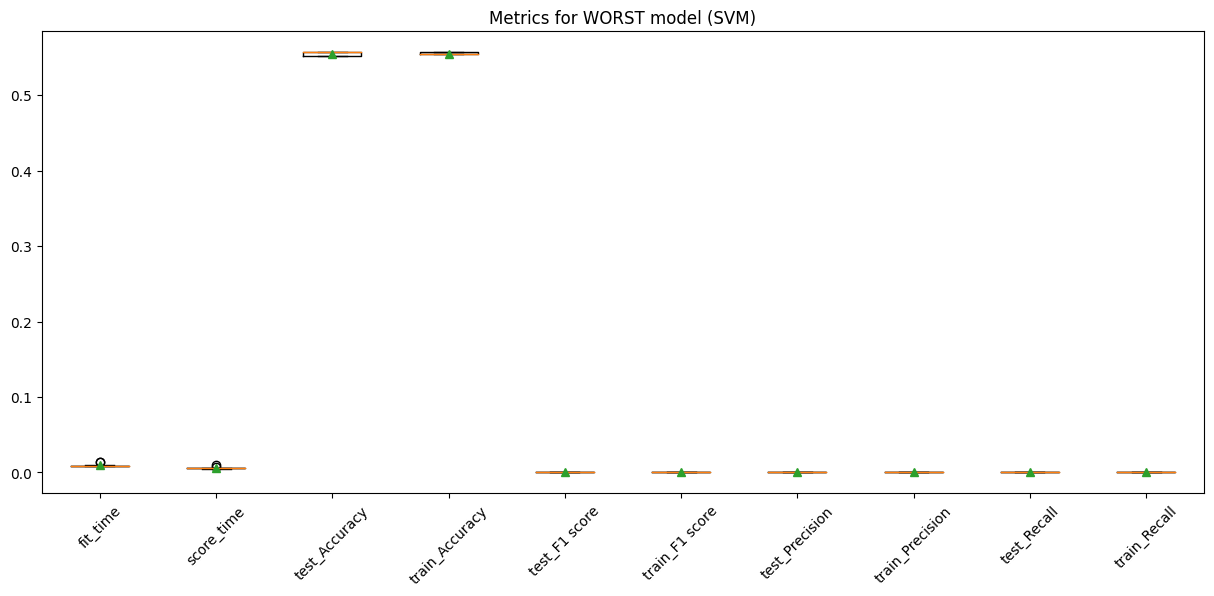

In [ ]:

best_model_scores = pd.DataFrame(resultados[0])

plt.figure(figsize=(15, 6))
plt.title("Metrics for WORST model (SVM)")
plt.boxplot(best_model_scores, labels=['fit_time','score_time','test_Accuracy','train_Accuracy','test_F1 score'
                                    ,'train_F1 score','test_Precision','train_Precision','test_Recall','train_Recall'], showmeans=True)
plt.xticks(rotation=45)                                    
plt.show(block=True);

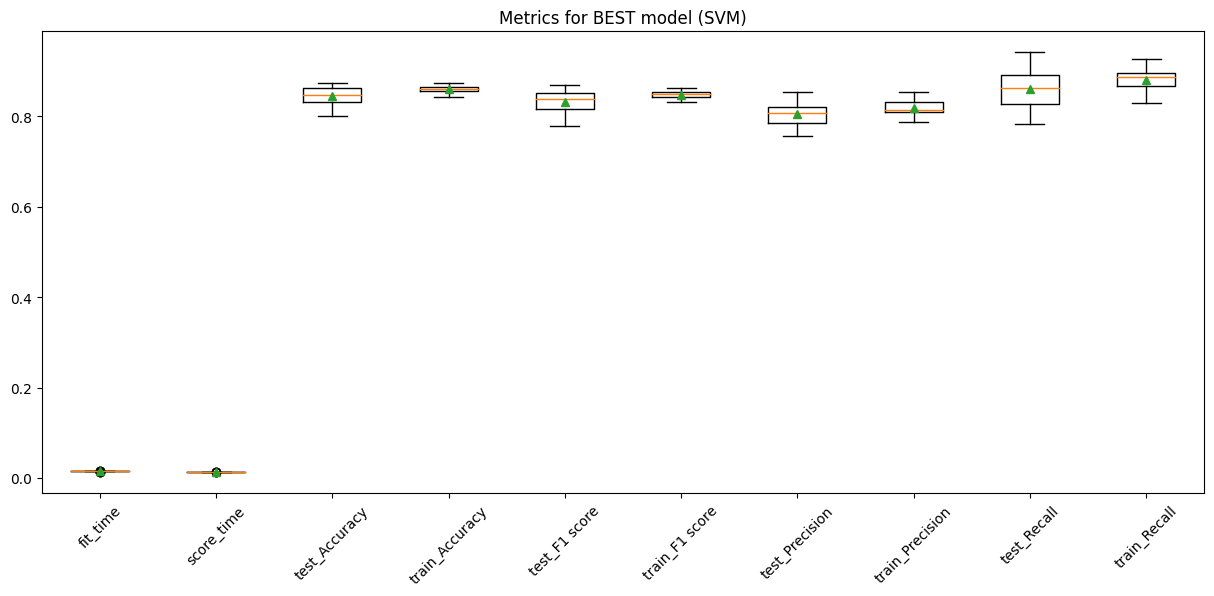

In [ ]:
best_model_scores = pd.DataFrame(resultados[1])

plt.figure(figsize=(15, 6))
plt.title("Metrics for BEST model (SVM)")
plt.boxplot(best_model_scores, labels=['fit_time','score_time','test_Accuracy','train_Accuracy','test_F1 score'
                                    ,'train_F1 score','test_Precision','train_Precision','test_Recall','train_Recall'], showmeans=True)
plt.xticks(rotation=45)                                    
plt.show(block=True);

#**Ejercicio-6.**

Verifica que el modelo no esté subentrenado o sobreentrenado mediante alguna de las gráficas de 
curvas de entrenamiento (aumentando la complejidad o aumentando el conjunto de entrenamiento, 
la que consideres más adecuada). De ser necesario, realiza los ajustes necesarios para evitar alguno 
de estos problemas. 

    Nuestro modelo nunca converge, muestra un poco de sobreentrenamiento.

In [ ]:
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores, xlabel, ylabel, title):

    try:
      train_mean = np.mean(train_scores, axis=1)
      train_std = np.std(train_scores, axis=1)
      val_mean = np.mean(val_scores, axis=1)
      val_std = np.std(val_scores, axis=1)
    except:
      train_mean = np.mean(train_scores)
      train_std = np.std(train_scores)
      val_mean = np.mean(val_scores)
      val_std = np.std(val_scores)

    # Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar.
    plt.figure(figsize=(7,6))
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')
    
    plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation')
    plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend(loc='lower left')
    plt.show()

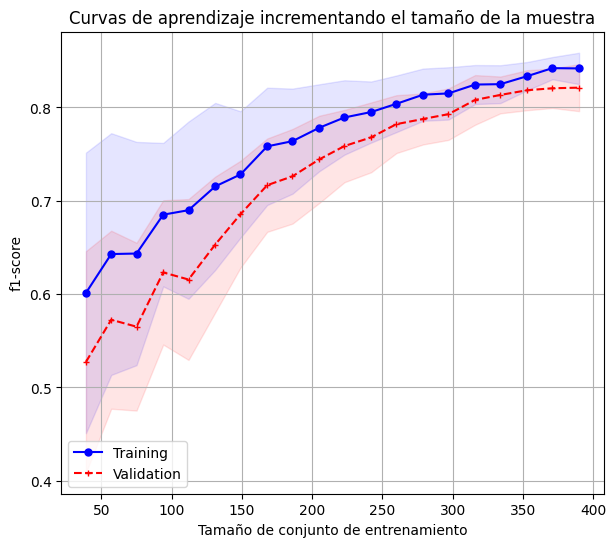

In [ ]:
pipeline = Pipeline(steps=[('m',models[i].fit(XtrainvalTransf,ytv.values.ravel()))])

delta_train_sz = np.linspace(0.1, 1, 20)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)

# Other possible scorings check sklearn.metrics.SCORERS.keys()
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                          X = XtrainvalTransf,
                                          y = ytv.values.ravel(),
                                          cv = cv ,
                                          shuffle = True,
                                          train_sizes = delta_train_sz ,
                                          random_state=11,scoring ='f1')

# Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 
                                                 'Tamaño de conjunto de entrenamiento', 
                                                 'f1-score', 
                                                 'Curvas de aprendizaje incrementando el tamaño de la muestra')

    Se observa que la diferencia entre las curvas de entrenamiento y validación va disminuyendo conforme se aumenta el tamño del conjunto de entrenamiento, 
    haciendo efectivo el hecho de aumentar el tamaño del entranamiento para minimizar el overfiting 

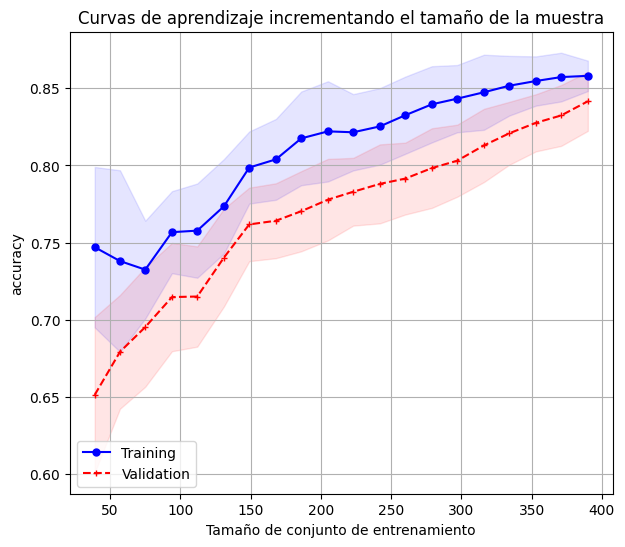

In [ ]:
pipeline = Pipeline(steps=[('m',models[i].fit(XtrainvalTransf,ytv.values.ravel()))])

delta_train_sz = np.linspace(0.1, 1, 20)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)

# Other possible scorings check sklearn.metrics.SCORERS.keys()
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                          X = XtrainvalTransf,
                                          y = ytv.values.ravel(),
                                          cv = cv ,
                                          shuffle = True,
                                          train_sizes = delta_train_sz ,
                                          random_state=11,scoring ='accuracy')

# Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 
                                                 'Tamaño de conjunto de entrenamiento', 
                                                 'accuracy', 
                                                 'Curvas de aprendizaje incrementando el tamaño de la muestra')

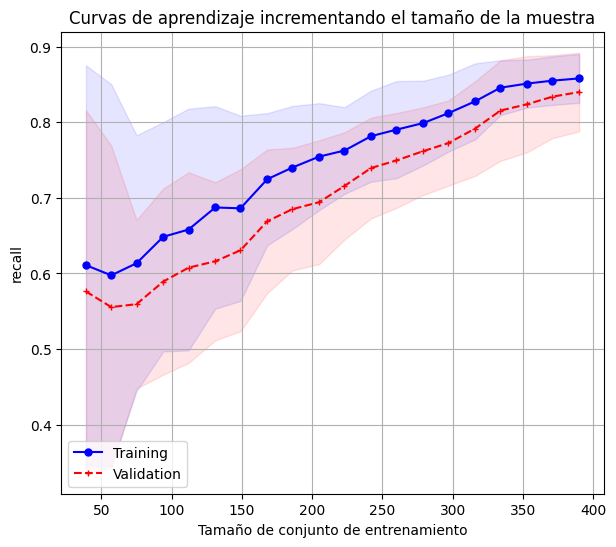

In [ ]:
pipeline = Pipeline(steps=[('m',models[i].fit(XtrainvalTransf,ytv.values.ravel()))])

delta_train_sz = np.linspace(0.1, 1, 20)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)

# Other possible scorings check sklearn.metrics.SCORERS.keys()
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                          X = XtrainvalTransf,
                                          y = ytv.values.ravel(),
                                          cv = cv ,
                                          shuffle = True,
                                          train_sizes = delta_train_sz ,
                                          random_state=11,scoring ='recall')

# Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 
                                                 'Tamaño de conjunto de entrenamiento', 
                                                 'recall', 
                                                 'Curvas de aprendizaje incrementando el tamaño de la muestra')

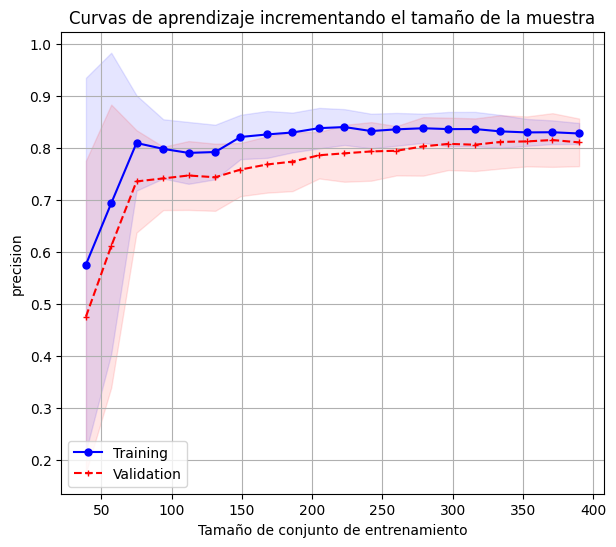

In [ ]:
pipeline = Pipeline(steps=[('m',models[i].fit(XtrainvalTransf,ytv.values.ravel()))])

delta_train_sz = np.linspace(0.1, 1, 20)
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)

# Other possible scorings check sklearn.metrics.SCORERS.keys()
tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipeline ,    
                                          X = XtrainvalTransf,
                                          y = ytv.values.ravel(),
                                          cv = cv ,
                                          shuffle = True,
                                          train_sizes = delta_train_sz ,
                                          random_state=11,scoring ='precision')

# Obtenemos el gráfico con las curvas de aprendizaje para f1 score:
mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores, 
                                                 'Tamaño de conjunto de entrenamiento', 
                                                 'precision', 
                                                 'Curvas de aprendizaje incrementando el tamaño de la muestra')

#**Ejercicio-7.**

Con los mejores hiperparámetros entontrados encontrar la gráfica de la curva ROC y su área bajo la curva

In [ ]:
ypred = BestSVM_Model.predict(Xtest)

cm = confusion_matrix(ytest, ypred)    # los renglones son los reales y las columnas las predicciones.
print(cm)

tt = np.sum(cm)
print('real-0: [%.3f, %.3f]' % (cm[0,0]/tt, cm[0,1]/tt))
print('real-1: [%.3f, %.3f]' % (cm[1,0]/tt, cm[1,1]/tt))

[[57  1]
 [38  8]]
real-0: [0.548, 0.010]
real-1: [0.365, 0.077]


In [ ]:
TPrate = cm[1,1]/(cm[1,0]+cm[1,1])
FPrate = cm[0,1]/(cm[0,0]+cm[0,1])
print('TP_rate-recall:%.5f' % TPrate)
print('FP_rate:%.5f' % FPrate)

TP_rate-recall:0.17391
FP_rate:0.01724


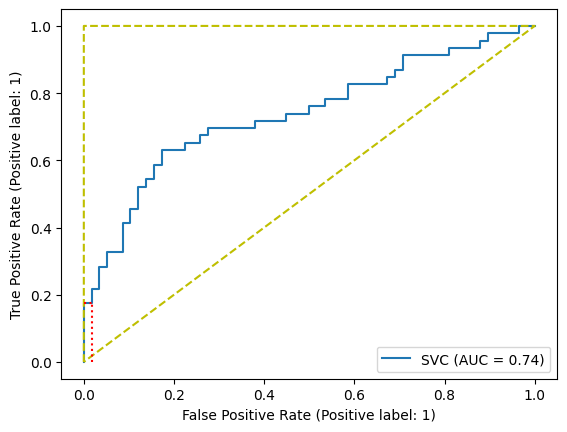

In [ ]:
RocCurveDisplay.from_estimator(BestSVM_Model, Xtest, ytest)
plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.hlines(TPrate, 0, FPrate, colors='r', linestyles='dotted')  # Se calcula TPrate y FPrate con base a threshold=0.5
plt.vlines(FPrate, 0, TPrate, colors='r', linestyles='dotted')  # Pero el mejor umbral para que ambos errores estén lo más equilibrados
plt.show()    

    La curva ROC incrementa la tasa de verdaderos positivos en su primera mitad. A la mitad el clasificador 
    de prueba incrementa la tasa de los falsos positivos. Estas son determinaciones nos dan a entender que el desempeño 
    bajo gradualmente dándonos como resultado un AUC regular con un valor de 0.74 

We can plot the objective function with respect to the threshold and see where its minimum is.

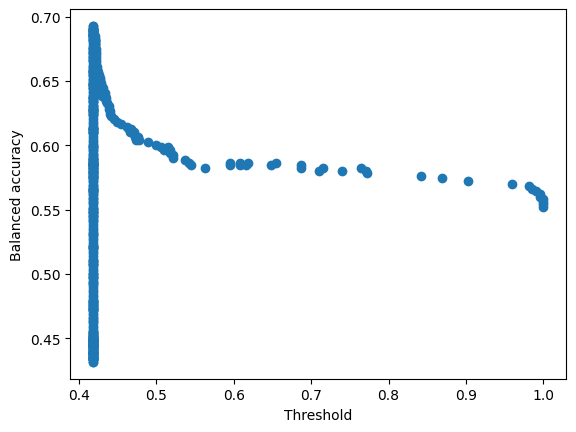

Best threshold to maximize accuracy


0.4183678377562817

In [ ]:
threshold = []
accuracy = []

for p in np.unique(BestSVM_Model.predict_proba(Xtrain)[:,1]):
  threshold.append(p)
  y_pred = (BestSVM_Model.predict_proba(Xtrain)[:,1] >= p).astype(int)
  accuracy.append(metrics.accuracy_score(ytrain,y_pred))

plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()  
print("Best threshold to maximize accuracy")
threshold[np.argmax(accuracy)]

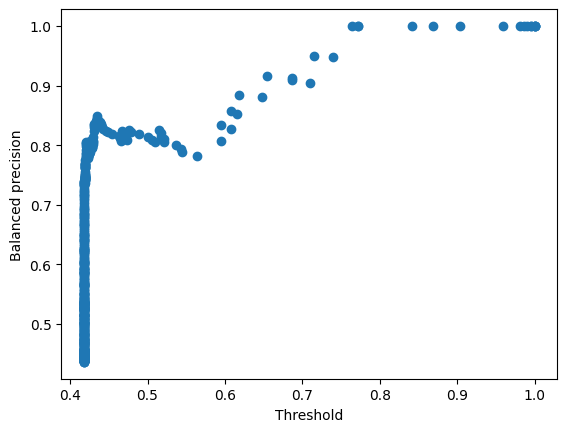

Best threshold to maximize precision


0.7640895603608403

In [ ]:
threshold = []
precision = []

for p in np.unique(BestSVM_Model.predict_proba(Xtrain)[:,1]):
  threshold.append(p)
  y_pred = (BestSVM_Model.predict_proba(Xtrain)[:,1] >= p).astype(int)
  precision.append(precision_score(ytrain,y_pred))

plt.scatter(threshold,precision)
plt.xlabel("Threshold")
plt.ylabel("Balanced precision")
plt.show()  
print("Best threshold to maximize precision")
threshold[np.argmax(precision)]

#**Ejercicio-8.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica 
f1-score

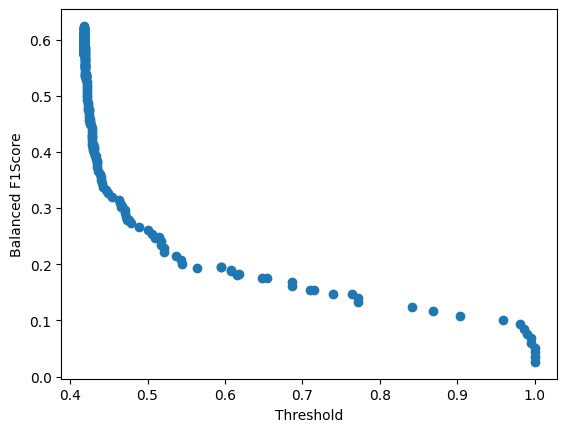

Best threshold to maximize F1Score


0.41773215853798296

In [ ]:
threshold = []
F1Score = []

for p in np.unique(BestSVM_Model.predict_proba(Xtrain)[:,1]):
  threshold.append(p)
  y_pred = (BestSVM_Model.predict_proba(Xtrain)[:,1] >= p).astype(int)
  F1Score.append(metrics.f1_score(ytrain,y_pred))

plt.scatter(threshold,F1Score)
plt.xlabel("Threshold")
plt.ylabel("Balanced F1Score")
plt.show()  
print("Best threshold to maximize F1Score")
threshold[np.argmax(F1Score)]

#**Ejercicio-9.**

Encontrar el valor del mejor umbral de predicción del modelo que maximice el valor de la métrica g-mean

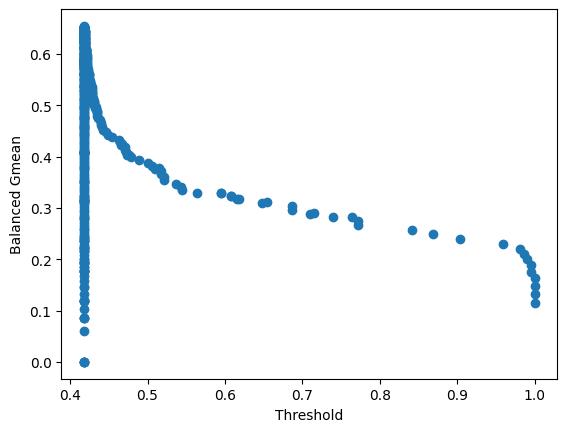

Best threshold to maximize Gmean


0.4183678377562817

In [ ]:
threshold = []
Gmean = []

for p in np.unique(BestSVM_Model.predict_proba(Xtrain)[:,1]):
  threshold.append(p)
  y_pred = (BestSVM_Model.predict_proba(Xtrain)[:,1] >= p).astype(int)
  Gmean.append(geometric_mean_score(ytrain,y_pred))

plt.scatter(threshold,Gmean)
plt.xlabel("Threshold")
plt.ylabel("Balanced Gmean")
plt.show()  
print("Best threshold to maximize Gmean")
threshold[np.argmax(Gmean)]

    Usando la métrica g-mean obtenemos un threshold maximizado de 0.4183, un valor con diferencia insignificante comparado con la métrica 
    F1 score. Incrementando la tasa de verdaderos positivos y alejando el clasificador de un estado aleatorio podríamos obtener un threshold 
    de valores sobre un 30% 

#**Ejercicio-10.**

**Incluye tus conclusiones finales de la actividad.**

    Podemos iniciar por analizar que el SVM se asemeja a busca solucionar un problema de optimización cuadrática ajustando un 
    hiperplano que nos ayude a minimizar el margen flexible que existe entre las clases.
      
    Después de realizar el ejercicio de transformación de variables, encontramos que los hiper parámetros óptimos utilizando Gridsearch son: 
    
    [SVC(C=10, class_weight='balanced', degree=2, max_iter=500)]
    
    De igual manera encontramos que el umbral óptimo para maximizar todas las variables es de 0.41. 
    
    Teniendo esto en cuenta podemos concluir que:

    •             Aunque los algoritmos SVM están formulados para la clasificación binaria, los algoritmos SVM multiclase 
    se construyen combinando varios clasificadores binarios

    •             Los SVM son muy populares como herramienta de apoyo porque  logran un buen rendimiento en muchas tareas de 
    clasificación y regresión , como hemos podido observar

    •             Otro punto importante es que los kernels hacen que los SVM sean más flexibles y capaces de gestionar problemas
    no lineales.
    
    •             Las Ventajas más importantes de los clasificadores de Máquinas de Vectores 
    de Soporte es que ofrecen una buena precisión y realizan predicciones más rápidas en comparación con el algoritmo de Naive Bayes. 


    •             Otra ventaja es que estos modelos también utilizan menos memoria porque utilizan un subconjunto de
    puntos de entrenamiento en la fase de decisión, lo cual hace que sean agiles y oportunos.
    
    Para concluir algunas de las Desventajas que podemos encontrar en SVM es que no suelen ser tan adecuadas para grandes 
    conjuntos de datos debido a su alto tiempo de formación, sobre todo considerando que requiere más tiempo de formación en 
    comparación con Naive Bayes. Otro factor a considerar es que a veces Funciona mal con clases superpuestas y también es 
    sensible al tipo de núcleo utilizado, lo cual dependiendo de la data debemos buscar la metodología ideal 
    para el análisis y entregar el resultado que se nos esté pidiendo para acompañar una rapida toma de decisiones.



 

###**Fin de la Actividad de la semana 8.**